In [ ]:
from google.colab import drive
drive.mount('content/')

Mounted at content/


In [ ]:
! pip install -q kaggle

In [ ]:
#create directory in root dir with name kaggle
!mkdir ~/.kaggle
#copy kaggle.json file in that dir
! cp /content/content/MyDrive/kaggle.json ~/.kaggle/
#change user permissions for file kaggle.json, 6 is 110 which is read and write permissions to user and no permissions to other people/groups 
! chmod 600 ~/.kaggle/kaggle.json
#! kaggle datasets list

In [ ]:
! kaggle competitions download -c galaxy-zoo-the-galaxy-challenge

  0% 0.00/520k [00:00<?, ?B/s]
100% 520k/520k [00:00<00:00, 55.2MB/s]
 65% 3.00M/4.63M [00:00<00:00, 29.6MB/s]
100% 4.63M/4.63M [00:00<00:00, 29.5MB/s]
 99% 780M/792M [00:13<00:00, 94.3MB/s]
100% 792M/792M [00:13<00:00, 62.5MB/s]
 99% 1.00G/1.01G [00:19<00:00, 114MB/s]
100% 1.01G/1.01G [00:19<00:00, 54.9MB/s]
  0% 0.00/265k [00:00<?, ?B/s]
100% 265k/265k [00:00<00:00, 115MB/s]
  0% 0.00/265k [00:00<?, ?B/s]
100% 265k/265k [00:00<00:00, 122MB/s]


In [ ]:

#create directories tp unzip the data
!mkdir X_train
!mkdir Y_train
!mkdir X_test

!unzip images_test_rev1.zip -d X_test
! unzip images_training_rev1.zip -d X_train
! unzip training_solutions_rev1.zip -d Y_train
#!mkdir X_test
#!mkdir central_pixel_benchmark

Streaming output truncated to the last 5000 lines.
  inflating: X_train/images_training_rev1/926435.jpg  
  inflating: X_train/images_training_rev1/926446.jpg  
  inflating: X_train/images_training_rev1/926448.jpg  
  inflating: X_train/images_training_rev1/926453.jpg  
  inflating: X_train/images_training_rev1/926462.jpg  
  inflating: X_train/images_training_rev1/926478.jpg  
  inflating: X_train/images_training_rev1/926480.jpg  
  inflating: X_train/images_training_rev1/926484.jpg  
  inflating: X_train/images_training_rev1/926488.jpg  
  inflating: X_train/images_training_rev1/926509.jpg  
  inflating: X_train/images_training_rev1/926522.jpg  
  inflating: X_train/images_training_rev1/926544.jpg  
  inflating: X_train/images_training_rev1/926547.jpg  
  inflating: X_train/images_training_rev1/926548.jpg  
  inflating: X_train/images_training_rev1/926551.jpg  
  inflating: X_train/images_training_rev1/926602.jpg  
  inflating: X_train/images_training_rev1/926630.jpg  
  inflating: X

In [ ]:
train_imgs_path = '/content/X_train/images_training_rev1'
test_imgs_path = '/content/X_test/images_test_rev1'
train_labels_path = '/content/Y_train/training_solutions_rev1.csv'

In [ ]:
import os
import math
import cv2
import random
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model
from sklearn.model_selection import train_test_split

print(tf.version.VERSION)

2.5.0


In [ ]:
train_img_dir = os.listdir(train_imgs_path)
test_img_dir = os.listdir(test_imgs_path)
print(len(train_img_dir),len(test_img_dir))
train_labels = pd.read_csv(train_labels_path)

61578 79975


In [ ]:
galaxy_dist =train_labels.drop(['GalaxyID'],axis=1)
Galaxy_id = train_labels['GalaxyID']
print(galaxy_dist.shape)
labels = np.array(galaxy_dist)

(61578, 37)


In [ ]:
class softmaxConversion(tf.keras.layers.Layer):
 
  def __init__(self, weights=False, units = 37, **kwargs):
    super(softmaxConversion, self).__init__(**kwargs)
    self.units = units
    self.input_dim = 37
    if weights:
      #output layer dimension and units
      weights_init = tf.random_normal_initializer()
      self.w = tf.Variable(
          initial_value=weights_init(shape=(self.input_dim, self.units), dtype="float32"),
          trainable=True,
      )
      bias_init = tf.zeros_initializer()
      self.b = tf.Variable(
          initial_value=bias_init(shape=(self.units,), dtype="float32"), trainable=True
      )
    else:
      self.trainable = False

  def get_config(self):
    config = super(softmaxConversion, self).get_config()
    config.update({"units": self.units})
    return config

  @classmethod
  def from_config(cls, config):
      return cls(**config)

  def getTasks(inputs):
    task1 = tf.nn.softmax(inputs[:, 0:3],axis=1) # 1.1 - 1.3
    task2 = tf.nn.softmax(inputs[:, 3:5],axis=1) # 2.1 - 2.2
    task3 = tf.nn.softmax(inputs[:, 5:7],axis=1) # 3.1 - 3.2
    task4 = tf.nn.softmax(inputs[:, 7:9], axis=1) # 4.1 - 4.2
    task5 = tf.nn.softmax(inputs[:, 9:13],axis=1) # 5.1 - 5.4
    task6 = tf.nn.softmax(inputs[:, 13:15],axis=1) # 6.1 - 6.2
    task7 = tf.nn.softmax(inputs[:, 15:18],axis=1) # 7.1 - 7.3
    task8 = tf.nn.softmax(inputs[:, 18:25],axis=1) # 8.1 - 8.7
    task9 = tf.nn.softmax(inputs[:, 25:28], axis=1) # 9.1 - 9.3
    task10 = tf.nn.softmax(inputs[:, 28:31],axis= 1) # 10.1 - 10.3
    task11 = tf.nn.softmax(inputs[:, 31:37],axis=1) # 11.1 - 11.6

    return (task1, task2, task3, task4, task5, task6, task7, task8, task9, task10, task11)

  def call(self, inputs):
    task1, task2, task3, task4, task5, task6, task7, task8, task9, task10, task11 = getTasks(inputs)     

    w1 = 1
    w2 = task1[:, 1] # question 1 answer 2
    w3 = task2[:, 1] * w2 # question 2 answer 2 * w2
    w4 = w3
    w7 = task1[:, 0] # question 1 answer 1
    w9 = task2[:, 0] * w2 # question 2 answer 1 * w2
    w10 = task4[:, 0] * w4 # question 4 answer 1 * w4
    w11 = w10
    w5 = w4 # THIS WAS WRONG BEFORE
    w6 = 1 # THIS SHOULD TECHNICALLY BE w5 + w7 + w9, but as explained on the forums, there was a mistake generating the dataset.
    # see http://www.kaggle.com/c/galaxy-zoo-the-galaxy-challenge/forums/t/6706/is-question-6-also-answered-for-stars-artifacts-answer-1-3 for more info
    w8 = task6[:, 0] * w6 # question 6 answer 1 * w6

    inp1 = w1*task1
    inp2 = w2*task2
    inp3 = w3*task3
    inp4 = w4*task4
    inp5 = w5*task5
    inp6 = w6*task6
    inp7 = w7*task7
    inp8 = w8*task8
    inp9 = w9*task9
    inp10 = w10*task10
    inp11 = w11*task11

    output = tf.concat([inp1,inp2,inp3,inp4,inp5,inp6,inp7,inp8,inp9,inp10,inp11],axis=1)

    return output

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

In [ ]:

def createDF(test_pred):
  print(test_pred.shape)

  #Galaxy IDs
  index = []
  for img in test_img_dir:
    img_id = img.split('.')[0]
    index.append(img_id)

  print(index[:2])

  galaxy_ids = pd.Series(index)
  galaxy_distributions = pd.DataFrame(test_pred)
  test_df = pd.concat([galaxy_ids,galaxy_distributions],axis=1)

  test_df.columns = list(train_labels.columns)
  print(test_df)
  filename = None
  filename = input("Input Filename with csv extension")
  #filename = 'test_images_predictions.csv'
  test_df.to_csv(filename,index=False)

  return filename, test_df

In [ ]:

def download_file(filename):
  from google.colab import files
  files.download(filename)

In [ ]:

#returns probability and index of maximum subtask of a task
def max(y_pred):
  pred1 = np.expand_dims(np.max(y_pred[:, 0:3],axis=1),axis=1) # 1.1 - 1.3
  pred2 = np.expand_dims(np.max(y_pred[:, 3:5],axis=1),axis=1) # 2.1 - 2.2
  pred3 = np.expand_dims(np.max(y_pred[:, 5:7],axis=1),axis=1) # 3.1 - 3.2
  pred4 = np.expand_dims(np.max(y_pred[:, 7:9],axis=1),axis=1) # 4.1 - 4.2
  pred5 = np.expand_dims(np.max(y_pred[:, 9:13],axis=1),axis=1) # 5.1 - 5.4
  pred6 = np.expand_dims(np.max(y_pred[:, 13:15],axis=1),axis=1) # 6.1 - 6.2
  pred7 = np.expand_dims(np.max(y_pred[:, 15:18],axis=1),axis=1) # 7.1 - 7.3
  pred8 = np.expand_dims(np.max(y_pred[:, 18:25],axis=1),axis=1) # 8.1 - 8.7
  pred9 = np.expand_dims(np.max(y_pred[:, 25:28],axis=1),axis=1) # 9.1 - 9.3
  pred10 = np.expand_dims(np.max(y_pred[:, 28:31],axis=1),axis=1) # 10.1 - 10.3
  pred11 = np.expand_dims(np.max(y_pred[:, 31:37],axis=1),axis=1)

  index1 = np.expand_dims(np.argmax(y_pred[:, 0:3],axis=1),axis=1) # 1.1 - 1.3
  index2 = np.expand_dims(np.argmax(y_pred[:, 3:5],axis=1),axis=1) # 2.1 - 2.2
  index3 = np.expand_dims(np.argmax(y_pred[:, 5:7],axis=1),axis=1) # 3.1 - 3.2
  index4 = np.expand_dims(np.argmax(y_pred[:, 7:9],axis=1),axis=1) # 4.1 - 4.2
  index5 = np.expand_dims(np.argmax(y_pred[:, 9:13],axis=1),axis=1) # 5.1 - 5.4
  index6 = np.expand_dims(np.argmax(y_pred[:, 13:15],axis=1),axis=1) # 6.1 - 6.2
  index7 = np.expand_dims(np.argmax(y_pred[:, 15:18],axis=1),axis=1) # 7.1 - 7.3
  index8 = np.expand_dims(np.argmax(y_pred[:, 18:25],axis=1),axis=1) # 8.1 - 8.7
  index9 = np.expand_dims(np.argmax(y_pred[:, 25:28],axis=1),axis=1) # 9.1 - 9.3
  index10 = np.expand_dims(np.argmax(y_pred[:, 28:31],axis=1),axis=1) # 10.1 - 10.3
  index11 = np.expand_dims(np.argmax(y_pred[:, 31:37],axis=1),axis=1)

  prediction = np.concatenate([pred1,pred2,pred3,pred4,pred5,pred6,pred7,pred8,pred9,pred10,pred11],axis=1)
  indices = np.concatenate([index1,index2,index3,index4,index5,index6,index7,index8,index9,index10,index11],axis=1)
  
  return prediction, indices

In [ ]:
#Y_pred = model.predict(test_generator,batch_size=32,verbose=1,steps=len(X_test)//32)
#prob_pred,ans_pred = max(Y_pred)
#prob_true,ans_true = max(Y_test)
#ans_pred.shape

In [ ]:
Questions = {1:"Is the galaxy simply smooth with no sign of a disk?",\
             2:"Could this be a disk viewed edge-on?",\
             3:"Is there a sign of a bar feature through the centre of the galaxy?",\
             4:"Is there any sign of a spiral arm pattern?",\
             5:"How prominent is the central bulge, compared with the rest of the galaxy?",\
             6:"Is there anything odd?",\
             7:"How rounded is it?",\
             8:"Is the odd feature a ring, or is the galaxy disturbed or irregular?",\
             9:"Does the galaxy have a bulge at its centre? If so, what shape?",\
             10:"How tightly wound do the spiral arms appear?",\
             11:"How many spiral arms are there?"}

Answers = {1:["smooth","disk","star or artifact"],\
             2:["yes","no"],\
             3:["yes","no"],\
             4:["yes","no"],\
             5:["no bulge","just noticeable bulge","obvious bulge","dominant bulge"],\
             6:["yes","no"],\
             7:["complete roundedness","in-between roundedness","cigar-shaped roundedness"],\
             8:["ring","gravitational lens or arc","disturbed galaxy","irrregular galaxy","other","merger","dust lane galaxy"],\
             9:["rounded bulge","boxy bulge","NO bulge"],\
             10:["tight spiral arms","medium spiral arms","loose spiral arms"],\
             11:["1 spiral arm","2 spiral arms","3 spiral arms","4 spiral arms","more than 4 spiral arms","can't count spiral arms"]}


In [ ]:
#print(galaxy_dist.iloc[5])
def print_output(path,galaxy,pred,true):
  img = plt.imread(os.path.join(path,galaxy))
  cropped_img = img[84:341,84:341,:]
  plt.imshow(cropped_img,interpolation='nearest')
  for i in range(11):
    print("\nQuestion:\t",Questions[i+1])
    print("Answer:\t\t",Answers[i+1][pred[i]],prob_pred[75,i])
    print("True Answer:\t",Answers[i+1][true[i]],prob_true[75,i])

#print_output(train_imgs_path,X_test[75],ans_pred[75],ans_true[75])

In [ ]:

random.seed(42)

def dataGenerator(directory,image_paths,labels,batch_size, size ,color_mode='gray',augmentation = True):
  
  X, Y = list(), list()  
  bs = 0
  
  while 1:
    for img_path,label in zip(image_paths,labels):
      bs+=1
      img = cv2.imread(os.path.join(directory,img_path))
      #print(type(img),img.shape)
      #crop the image to 224 * 224
      cropped_img = img[100:324,100:324,:]
      
      if color_mode=='gray':
        gray = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)
        resized_img = cv2.resize(gray, size, interpolation = cv2.INTER_AREA)
      else:
        resized_img = cv2.resize(cropped_img, size, interpolation = cv2.INTER_AREA)

      if augmentation==True:
        aug_images = ImageAugmentation(resized_img, hflip=True, vflip=True, rot_angle = 180, bright=True, z = True)
        [X.append(image/255) for image in aug_images]
        [Y.append(label) for i in range(len(aug_images))]

      else:
        scaled_image = resized_img/255
        
        X.append(scaled_image)
        Y.append(label)
        #cv2.destroyAllWindows()

      if bs==batch_size or image_paths.index(img_path)==len(image_paths)-1:
        dx, dy = np.array(X), np.array(Y)
        #print(dx.shape, dy.shape)
        yield (dx,dy)
        X, Y = list(), list()
        bs=0


In [ ]:
def horizontal_flip(image):
  return cv2.flip(image, 1)

def vertical_flip(image):
  return cv2.flip(image, 0)

In [ ]:
def rotation(image, angle):
  angle = int(random.uniform(-angle, angle))
  h, w = image.shape[:2]
  M = cv2.getRotationMatrix2D((int(w/2), int(h/2)), angle, 1)
  image = cv2.warpAffine(image, M, (w, h))
  return image

In [ ]:
def brightness(img, low, high):
    value = random.uniform(low, high)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv = np.array(hsv, dtype = np.float64)
    hsv[:,:,1] = hsv[:,:,1]*value
    hsv[:,:,1][hsv[:,:,1]>255]  = 255
    hsv[:,:,2] = hsv[:,:,2]*value 
    hsv[:,:,2][hsv[:,:,2]>255]  = 255
    hsv = np.array(hsv, dtype = np.uint8)
    img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return img

In [ ]:
def zoom(img, value):
    if value > 1 or value < 0:
        print('Value for zoom should be less than 1 and greater than 0')
        return img
    #value = random.uniform(value, 1)
    h, w = img.shape[:2]
    h_taken = int(value*h)
    w_taken = int(value*w)
    h_start = random.randint(0, h-h_taken)
    w_start = random.randint(0, w-w_taken)
    if len(img.shape)==2:
      img = img[h_start:h_start+h_taken, w_start:w_start+w_taken]
    else:
      img = img[h_start:h_start+h_taken, w_start:w_start+w_taken,:]
    img = cv2.resize(img, (h, w), cv2.INTER_CUBIC)
    return img

In [ ]:
def ImageAugmentation(image, hflip, vflip, rot_angle, bright, z):
  aug_images = [image]
  if hflip:
    aug_images.append(horizontal_flip(image))
  
  if vflip:
    aug_images.append(vertical_flip(image))
  
  if rot_angle:
    aug_images.append(rotation(image, rot_angle))
  
  if bright:
    aug_images.append(brightness(image, low = 1, high = 2))
  
  if z:
    aug_images.append(zoom(image, 0.8))

  return aug_images

In [ ]:
def get_generators(image_shape = (64, 64), batch_size = 32, color_mode = 'gray', augmentation = False):

  X_train, X_val, Y_train, Y_val = train_test_split(train_img_dir, labels, test_size = 0.2, shuffle=True, random_state = 42)

  assert (len(X_train)==Y_train.shape[0])
  assert (len(X_val)==Y_val.shape[0])
  print("Training data size", len(X_train))
  print("Validation data size",len(X_val))

  train_gen = dataGenerator(train_imgs_path, X_train, Y_train, batch_size, image_shape, color_mode, augmentation)
  val_gen = dataGenerator(train_imgs_path, X_val, Y_val, batch_size, image_shape, color_mode, augmentation=False)
  test_gen = dataGenerator(test_imgs_path, test_img_dir, np.ones((len(test_img_dir),1)) , batch_size, image_shape, color_mode,augmentation = False)

  return train_gen, val_gen, test_gen

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epochs, logs = {}):

    if logs.get('loss') <.0099:
      print("\nloss is less than 0.0099 hence stoping the execution")
      self.model.stop_training = True


#RESNET MODEL

In [ ]:
#Resnet50
def ResNet(image_shape, opt = 'Adam', loss_func = 'mse'):
  model = tf.keras.models.Sequential(
      [tf.keras.applications.resnet50.ResNet50(weights = None, input_shape=image_shape, pooling='avg', include_top = False),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(37, activation='relu'),
      tf.keras.layers.Layer(softmaxConversion(weights = False)),
      ]
  )
  model.compile(optimizer= opt, loss= loss_func)
  return model


In [ ]:
def get_resnet_model(shape,checkpoint_filepath,checkpoint_filename):
  drive_content = os.listdir('/content/content/MyDrive')
  #print(drive_content)
  if checkpoint_filename in drive_content:
    print("\nsaved resnet model loaded successfully")
    model = load_model(checkpoint_filepath, compile= True, custom_objects={"softmaxConversion":softmaxConversion})
    return model

  else:
    optimizer = tf.keras.optimizers.Adam()
    model = ResNet(image_shape = shape, opt = optimizer, loss_func='mse')
    return model

In [ ]:
#Multilayer Perceptron Model
#flag decides the weights initialization in output layer
def ANN(image_shape, opt = 'Adam', loss_func = 'mse', flag = False):
  model = tf.keras.models.Sequential(
      [
      tf.keras.layers.Flatten(input_shape = image_shape),
      tf.keras.layers.Dense(4096,activation='relu'),
      tf.keras.layers.Dense(512,activation='relu'),
      tf.keras.layers.Dense(256, activation= "relu"),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(37, activation= "relu"),
      tf.keras.layers.Layer(softmaxConversion(units = 37, weights = flag))
      ]   
  )

  model.compile(optimizer= opt , loss= loss_func)
  return model

In [ ]:
def get_ann_model(shape,checkpoint_filepath,checkpoint_filename):
  drive_content = os.listdir('/content/content/MyDrive')
  #print(drive_content)
  if checkpoint_filename in drive_content:
    print("\nsaved model loaded successfully")
    model = load_model(checkpoint_filepath, compile= True, custom_objects={"softmaxConversion":softmaxConversion})
    return model

  else:
    #without explicit learning rate decay
    optimizer = tf.keras.optimizers.Adam()
    #with explicit learning rate decay
    #decayed_lr = tf.keras.optimizers.schedules.ExponentialDecay(
    #initial_learning_rate = 0.001, decay_steps = 10000, decay_rate = 0.9, staircase= True, name= 'exponentialDecay')
    #optimizer = tf.keras.optimizers.Adam(decayed_lr)
    
    model = ANN(image_shape = shape, opt = optimizer, loss_func='mse', flag=False)
    return model



#RESNET


*   Without Data Augmentation
*   RGB Images



In [ ]:
checkpoint_filepath = '/content/content/MyDrive/resnet50_checkpoint_without_aug'
checkpoint_filename = 'resnet50_checkpoint_without_aug'

#define and compile model
resnet_model1 = get_resnet_model((224,224,3), checkpoint_filepath, checkpoint_filename)
resnet_model1.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 37)                75813     
_________________________________________________________________
layer (Layer)                (None, 37)                0         
Total params: 23,663,525
Trainable params: 23,610,405
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
#fit the model
num_epochs  = 2
bs = 32

spe = math.ceil(len(X_train)/bs)
val_steps = math.ceil(len(X_val)/bs)

stop_callback = myCallback()
savemodel_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=False, save_best_only=False)

train_gen, val_gen, test_gen = get_generators(image_shape = (224,224), batch_size = bs, color_mode = 'rgb', augmentation= False)

history = resnet_model1.fit(train_gen, validation_data = val_gen, epochs= num_epochs, steps_per_epoch= spe, \
                           verbose = 1, callbacks = [stop_callback, savemodel_callback])

In [ ]:
plot_graphs(history, 'loss')
plt.savefig('/content/content/MyDrive/cost_reduction_graph_resnet1.png')

In [ ]:
steps = math.ceil(len(X_test)/bs)
print("Total Test Images",len(X_test))

test_pred = resnet_model1.predict(test_gen, batch_size = bs, steps= steps, verbose=1)
print("Test Prediction Shape",test_pred.shape)

#RESNET MODEL


*   With data augmentation
*   RGB Images



In [ ]:
checkpoint_filepath = '/content/content/MyDrive/resnet50_checkpoint_with_aug'
checkpoint_filname = 'resnet50_checkpoint_with_aug'

#define and compile model
resnet_model2 = get_resnet_model(shape = (224,224,3), checkpoint_filepath, checkpoint_filename)
resnet_model2.summary()

In [ ]:
#fit the model
num_epochs  = 2
bs = 32

spe = math.ceil(len(X_train)/bs)
val_steps = math.ceil(len(X_val)/bs)

stop_callback = myCallback()
savemodel_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=False, save_best_only=False)

train_gen, val_gen, test_gen = get_generators(image_shape = (224,224), batch_size = bs, color_mode = 'rgb', augmentation= True)

history = resnet_model2.fit(train_gen, validation_data = val_gen, epochs= num_epochs, steps_per_epoch= spe, \
                           verbose = 1, callbacks = [stop_callback, savemodel_callback])

In [ ]:
plot_graphs(history, 'loss')
plt.savefig('/content/content/MyDrive/cost_reduction_graph_resnet2.png')

In [ ]:
steps = math.ceil(len(X_test)/bs)
print("Total Test Images",len(X_test))

test_pred = resnet_model2.predict(test_gen, batch_size = bs, steps= steps, verbose=1)
print("Test Prediction Shape",test_pred.shape)

#Multilayer Perceptron


*   Without Data Augmentation
*   Grayscale Images



In [ ]:
mlp_checkpoint_filepath = '/content/content/MyDrive/mlp_gray_model_without_aug2'
mlp_checkpoint_filename = 'mlp_gray_model_without_aug2'

mlp_rgb_model1 = get_ann_model((64,64) , mlp_checkpoint_filepath, mlp_checkpoint_filename)
mlp_rgb_model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 4096)              16781312  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               2097664   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 37)                9509      
_________________________________________________________________
layer (Layer)                (None, 37)                0

In [ ]:
num_epochs  = 5
bs = 32

spe = math.ceil(len(train_img_dir*0.8)/bs)
val_steps = math.ceil(len(train_img_dir*0.2)/bs)

stop_callback = myCallback()
savemodel_callback = tf.keras.callbacks.ModelCheckpoint(filepath=mlp_checkpoint_filepath, save_weights_only=False, save_best_only=False)

train_gen, val_gen, test_gen = get_generators(image_shape = (64,64), batch_size = bs, color_mode = 'gray', augmentation= False)

history = mlp_rgb_model1.fit(train_gen, validation_data = val_gen, epochs= num_epochs, steps_per_epoch = spe, \
                            validation_steps = val_steps, verbose = 1, callbacks=[stop_callback, savemodel_callback])

Epoch 1/5
1540/1540 [==============================] - 937s 608ms/step - loss: 0.0394 - val_loss: 0.0273
INFO:tensorflow:Assets written to: /content/content/MyDrive/mlp_gray_model_without_aug/assets
Epoch 2/5
1540/1540 [==============================] - 922s 599ms/step - loss: 0.0271 - val_loss: 0.0272
INFO:tensorflow:Assets written to: /content/content/MyDrive/mlp_gray_model_without_aug/assets
Epoch 3/5
1540/1540 [==============================] - 921s 598ms/step - loss: 0.0271 - val_loss: 0.0272
INFO:tensorflow:Assets written to: /content/content/MyDrive/mlp_gray_model_without_aug/assets
Epoch 4/5
1540/1540 [==============================] - 933s 606ms/step - loss: 0.0271 - val_loss: 0.0272
INFO:tensorflow:Assets written to: /content/content/MyDrive/mlp_gray_model_without_aug/assets
Epoch 5/5
1540/1540 [==============================] - 927s 602ms/step - loss: 0.0273 - val_loss: 0.0272
INFO:tensorflow:Assets written to: /content/content/MyDrive/mlp_gray_model_without_aug/assets


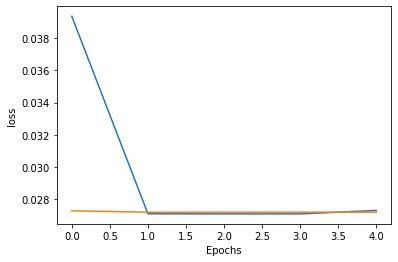

<Figure size 432x288 with 0 Axes>

In [ ]:
plt = plot_graphs(history, string = 'loss')

In [ ]:
steps = math.ceil(len(test_img_dir)/bs)
print("Total Test Images",len(test_img_dir))

test_pred = mlp_rgb_model1.predict(test_gen, batch_size = bs, steps= steps, verbose=1)
print("Test Prediction Shape",test_pred.shape)

Total Test Images 79975
2500/2500 [==============================] - 642s 257ms/step
Test Prediction Shape (79975, 37)


In [ ]:
test_prediction_filename, test_pred_df = createDF(test_pred)

(79975, 37)
['633521', '619275']
      GalaxyID  Class1.1  Class1.2  ...  Class11.4  Class11.5  Class11.6
0       633521  0.424601  0.550695  ...        0.0        0.0   0.077123
1       619275  0.424601  0.550695  ...        0.0        0.0   0.077123
2       170145  0.424601  0.550695  ...        0.0        0.0   0.077123
3       349543  0.424601  0.550695  ...        0.0        0.0   0.077123
4       798880  0.424601  0.550695  ...        0.0        0.0   0.077123
...        ...       ...       ...  ...        ...        ...        ...
79970   467624  0.424601  0.550695  ...        0.0        0.0   0.077123
79971   410061  0.424601  0.550695  ...        0.0        0.0   0.077123
79972   671680  0.424601  0.550695  ...        0.0        0.0   0.077123
79973   813752  0.424601  0.550695  ...        0.0        0.0   0.077123
79974   370646  0.424601  0.550695  ...        0.0        0.0   0.077123

[79975 rows x 38 columns]
Input Filename with csv extensiontest_predictions_gray1.csv


#Mulilayer Pecrceptron


*   With Data Augmentation
*   Grayscale Images



In [ ]:
mlp_checkpoint_filepath = '/content/content/MyDrive/mlp_gray_model_with_aug2'
mlp_checkpoint_filename = 'mlp_gray_model_with_aug2'

mlp_rgb_model2 = get_ann_model((64,64) , mlp_checkpoint_filepath, mlp_checkpoint_filename)
mlp_rgb_model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dense_5 (Dense)              (None, 512)               2097664   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 37)                9509      
_________________________________________________________________
layer_1 (Layer)              (None, 37)               

In [ ]:
num_epochs  = 5
bs = 32

spe = math.ceil(round(0.8*len(train_img_dir))/bs)
val_steps = math.ceil(round(0.2*len(train_img_dir))/bs)
#print(round(0.8*len(train_img_dir)),round(0.2*len(train_img_dir)))

stop_callback = myCallback()
savemodel_callback = tf.keras.callbacks.ModelCheckpoint(filepath=mlp_checkpoint_filepath, save_weights_only=False, save_best_only=False)

train_gen, val_gen, test_gen = get_generators(image_shape = (64,64), batch_size = bs, color_mode = 'gray', augmentation= True)
  
history = mlp_rgb_model2.fit(train_gen, validation_data = val_gen, epochs= num_epochs, steps_per_epoch = spe, \
                            validation_steps = val_steps, verbose = 1, callbacks=[stop_callback, savemodel_callback])

Training data size 49262
Validation data size 12316


error: ignored

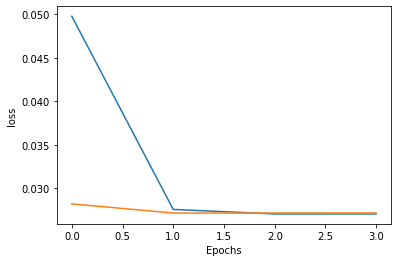

In [ ]:
plot_graphs(history, string = 'loss')

In [ ]:
steps = math.ceil(len(test_img_dir)/bs)
print("Total Test Images",len(test_img_dir))

test_pred = mlp_rgb_model2.predict(test_gen, batch_size = bs, steps= steps, verbose=1)
print("Test Prediction Shape",test_pred.shape)

Total Test Images 79975
2500/2500 [==============================] - 648s 259ms/step
Test Prediction Shape (79975, 37)


In [ ]:
test_filename, test_pred_df = createDF(test_pred)

(79975, 37)
['633521', '619275']
      GalaxyID  Class1.1  Class1.2  ...  Class11.4  Class11.5  Class11.6
0       633521  0.424511  0.550484  ...        0.0        0.0   0.077141
1       619275  0.424511  0.550484  ...        0.0        0.0   0.077141
2       170145  0.424511  0.550484  ...        0.0        0.0   0.077141
3       349543  0.424511  0.550484  ...        0.0        0.0   0.077141
4       798880  0.424511  0.550484  ...        0.0        0.0   0.077141
...        ...       ...       ...  ...        ...        ...        ...
79970   467624  0.424511  0.550484  ...        0.0        0.0   0.077141
79971   410061  0.424511  0.550484  ...        0.0        0.0   0.077141
79972   671680  0.424511  0.550484  ...        0.0        0.0   0.077141
79973   813752  0.424511  0.550484  ...        0.0        0.0   0.077141
79974   370646  0.424511  0.550484  ...        0.0        0.0   0.077141

[79975 rows x 38 columns]
Input Filename with csv extensiontest_predictions_gray_with_aug.

#Multilayer Perceptron


*   Without Data Augmentation
*   RGB Images



In [ ]:
mlp_checkpoint_filepath = '/content/content/MyDrive/mlp_rgb_model_without_aug'
mlp_checkpoint_filename = 'mlp_rgb_model_without_aug'

mlp_rgb_model3 = get_ann_model((128, 128, 3), mlp_checkpoint_filepath, mlp_checkpoint_filename)
mlp_rgb_model3.summary() 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 49152)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 4096)              201330688 
_________________________________________________________________
dense_6 (Dense)              (None, 512)               2097664   
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 37)                9509      
_________________________________________________________________
layer_2 (Layer)              (None, 37)               

In [ ]:
num_epochs  = 4
bs = 32

spe = math.ceil(round(0.8*len(train_img_dir))/bs)
val_steps = math.ceil(round(0.2*len(train_img_dir))/bs)

stop_callback = myCallback()
savemodel_callback = tf.keras.callbacks.ModelCheckpoint(filepath=mlp_checkpoint_filepath, save_weights_only=False, save_best_only=False)

train_gen, val_gen, test_gen = get_generators(image_shape = (128,128), batch_size = bs, color_mode = 'rgb', augmentation= False)

history = mlp_rgb_model3.fit(train_gen, validation_data = val_gen, epochs= num_epochs, steps_per_epoch = spe, \
                            validation_steps = val_steps, verbose = 1, callbacks=[stop_callback, savemodel_callback])


Training data size 49262
Validation data size 12316
Epoch 1/4
1540/1540 [==============================] - 2265s 1s/step - loss: 0.0887 - val_loss: 0.0358
INFO:tensorflow:Assets written to: /content/content/MyDrive/mlp_rgb_model_without_aug/assets
Epoch 2/4
1540/1540 [==============================] - 2210s 1s/step - loss: 0.0319 - val_loss: 0.0315
INFO:tensorflow:Assets written to: /content/content/MyDrive/mlp_rgb_model_without_aug/assets
Epoch 3/4
1540/1540 [==============================] - 2242s 1s/step - loss: 0.0314 - val_loss: 0.0315
INFO:tensorflow:Assets written to: /content/content/MyDrive/mlp_rgb_model_without_aug/assets
Epoch 4/4
1540/1540 [==============================] - 2274s 1s/step - loss: 0.0314 - val_loss: 0.0315
INFO:tensorflow:Assets written to: /content/content/MyDrive/mlp_rgb_model_without_aug/assets


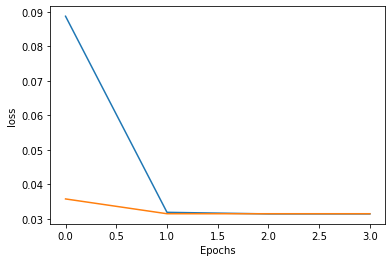

In [ ]:
plot_graphs(history, string = 'loss')

In [ ]:
steps = math.ceil(len(test_img_dir)/bs)
print("Total Test Images",len(test_img_dir))

test_pred = mlp_rgb_model3.predict(test_gen, batch_size = bs, steps= steps, verbose=1)
print("Test Prediction Shape",test_pred.shape)

Total Test Images 79975
2500/2500 [==============================] - 1255s 502ms/step
Test Prediction Shape (79975, 37)


In [ ]:
test_filename, test_pred_df = createDF(test_pred)

#Multilayer Perceptron


*   With Data Augmentation
*   RGB images



In [ ]:
mlp_checkpoint_filepath = '/content/content/MyDrive/mlp_rgb_model_with_aug2'
mlp_checkpoint_filename = 'mlp_rgb_model_with_aug2'

mlp_rgb_model4 = get_ann_model((64, 64, 3), mlp_checkpoint_filepath, mlp_checkpoint_filename)
mlp_rgb_model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 4096)              50335744  
_________________________________________________________________
dense_13 (Dense)             (None, 512)               2097664   
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 37)                9509      
_________________________________________________________________
layer_3 (Layer)              (None, 37)               

In [ ]:
num_epochs  = 5
bs = 32

spe = math.ceil(round(0.8*len(train_img_dir))/bs)
val_steps = math.ceil(round(0.2*len(train_img_dir))/bs)

stop_callback = myCallback()
savemodel_callback = tf.keras.callbacks.ModelCheckpoint(filepath=mlp_checkpoint_filepath, save_weights_only=False, save_best_only=False)

train_gen, val_gen, test_gen = get_generators(image_shape = (64,64), batch_size = bs, color_mode = 'rgb', augmentation= True)

history = mlp_rgb_model4.fit(train_gen, validation_data = val_gen, epochs= num_epochs, steps_per_epoch = spe, \
                            validation_steps = val_steps, verbose = 1, callbacks=[stop_callback, savemodel_callback])
plot_graphs(history, string = 'loss')


Training data size 49262
Validation data size 12316
Epoch 1/5
1540/1540 [==============================] - 1607s 1s/step - loss: 0.0358 - val_loss: 0.0274
INFO:tensorflow:Assets written to: /content/content/MyDrive/mlp_rgb_model_with_aug2/assets
Epoch 2/5
1540/1540 [==============================] - 1607s 1s/step - loss: 0.0271 - val_loss: 0.0271
INFO:tensorflow:Assets written to: /content/content/MyDrive/mlp_rgb_model_with_aug2/assets
Epoch 3/5
 978/1540 [==================>...........] - ETA: 9:09 - loss: 0.0270

In [ ]:
plot_graphs(history, string = 'loss')

NameError: ignored

In [ ]:
steps = math.ceil(len(X_test)/bs)
print("Total Test Images",len(X_test))

test_pred = mlp_rgb_model4.predict(test_gen, batch_size = bs, steps= steps, verbose=1)
print("Test Prediction Shape",test_pred.shape)

Total Test Images 79975
2499/2500 [============================>.] - ETA: 0s

InvalidArgumentError: ignored

In [ ]:
test_prediction_filename, test_pred_df = createDF(test_pred)

(79975, 37)
['633521', '619275']
      GalaxyID  Class1.1  Class1.2  ...  Class11.4  Class11.5  Class11.6
0       633521  0.387842  0.485520  ...        0.0        0.0   0.066076
1       619275  0.434483  0.534984  ...        0.0        0.0   0.063960
2       170145  0.440331  0.538160  ...        0.0        0.0   0.065235
3       349543  0.407064  0.511812  ...        0.0        0.0   0.061448
4       798880  0.462234  0.541889  ...        0.0        0.0   0.072573
...        ...       ...       ...  ...        ...        ...        ...
79970   467624  0.464735  0.543693  ...        0.0        0.0   0.075170
79971   410061  0.392918  0.496341  ...        0.0        0.0   0.062567
79972   671680  0.433015  0.526072  ...        0.0        0.0   0.067791
79973   813752  0.447817  0.538917  ...        0.0        0.0   0.070284
79974   370646  0.433646  0.520262  ...        0.0        0.0   0.072107

[79975 rows x 38 columns]
Input Filename with csv extensiontest_predictions_7.csv


In [ ]:
#test_pred_df
test_prediction_filename
download_file('/content/'+ test_prediction_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def show_image(directory,filenames,gray = True, subplot_cols = 2):
  imgs = []
  for filename in filenames:
    img = cv2.imread(os.path.join(directory,filename))
    if gray:
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    imgs.append(img)
  
  if subplot_cols==1:
    plt.imshow(imgs[0])
    return 

  rows = len(imgs)//subplot_cols
  cols = subplot_cols
  fig, ax = plt.subplots(rows, cols, figsize = (7,7))
  j, k = 0,0
  for i in range(len(imgs)):
    if k==cols:
      k=0
      j+=1
    if gray:
      ax[j,k].imshow(imgs[i], cmap='gray')
    else:
      ax[j,k].imshow(imgs[i])
    k+=1
    #ax[j,k].axis('off')


In [ ]:
def show_augmented_images(directory,filename):
  img = cv2.imread(os.path.join(directory,filename))
  aug_imgs = ImageAugmentation(img[84:340,84:340,:],hflip=True,vflip=False,rot_angle=-45)
  fig, axis = plt.subplots(2,2)
  axis[0,0].imshow(aug_imgs[0])
  axis[0,1].imshow(aug_imgs[1])
  axis[1,0].imshow(aug_imgs[2])

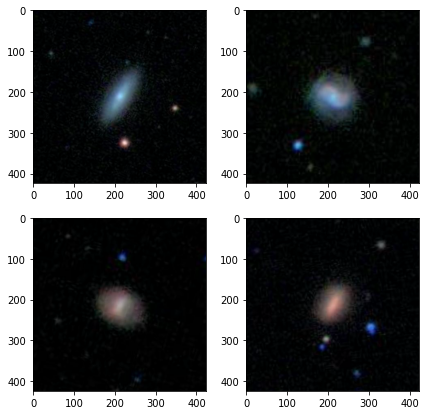

In [ ]:
lst = [train_img_dir[80], train_img_dir[82], train_img_dir[92], train_img_dir[93]]
show_image(train_imgs_path, lst,  gray = False)

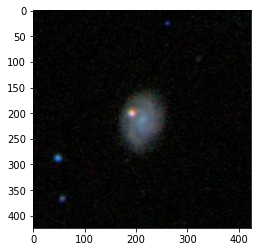

In [ ]:
img = cv2.imread(os.path.join(train_imgs_path,train_img_dir[82]))
plt.imshow(img)

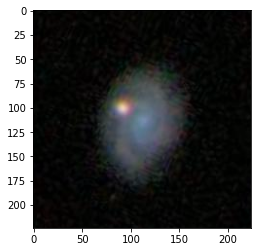

In [ ]:
img_cropped = img[100:324,100:324,:]
plt.imshow(img_cropped)

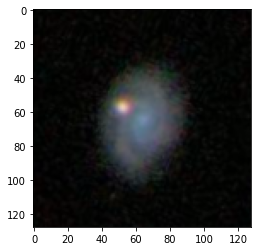

In [ ]:
img_resized = cv2.resize(img_cropped, (128, 128), interpolation = cv2.INTER_AREA)
plt.imshow(img_resized)

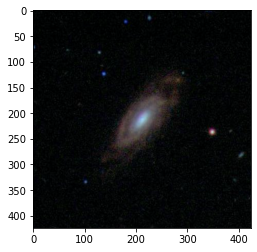

In [ ]:
img2 = cv2.imread(os.path.join(train_imgs_path,train_img_dir[982]))
plt.imshow(img2)

In [ ]:
image = img2[100:324, 100:324, :]
image = cv2.resize(image, (128, 128), interpolation = cv2.INTER_AREA)
#augmentated_imgs = ImageAugmentation(image, hflip = True, vflip = True, rot_angle = 180, bright = True, z = True)

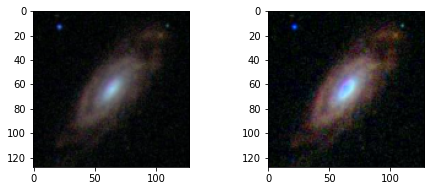

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize =(7,15))
plt.subplots_adjust( wspace = 0.5)

bright_image = brightness(image, low = 1, high = 2.0) 
ax[0].imshow(image)
ax[1].imshow(bright_image)

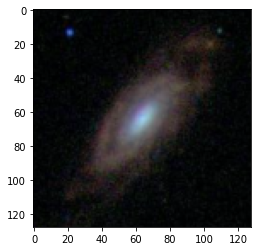

In [ ]:
plt.imshow(augmentated_imgs[0])

#Transfer Learning